# Análisis de regresión lineal

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSasJRUQoo8zf8paLgnVW4FfDn6G25ngFRSIg&usqp=CAU)

Vamos a utilizar las librerías científicas de Python para realizar un análisis de Regresión Lineal en una muestra de datos de precios de casas para hallar un modelo predictivo de Machine Learning sencillo: aprendizaje supervisado, es decir, un modelo que es entrenado con datos de entrada para luego predecir datos de salida.

___

## Regresión Lineal
Una herramienta matemática para modelar un fenómeno continuo es la Regresión Lineal, en donde todas las datos de una muestra son aproximados a una línea recta; esto es, se "modelan" los datos a una aproximación geométrica representada por una ecuación lineal. Se puede tener una idea del proceso como el ajuste de una línea recta de forma tal que todos los puntos de datos esten a la mínima distancia de la recta (formalmente, a la mínima distancia vertical al cuadrado). En el [blog de Julio Molero](https://elultimoversodefermat.wordpress.com/2019/03/11/la-regresion-lineal/) hay un tutorial gráfico de este proceso.

![](https://media.giphy.com/media/1kTNRve3ou82rqpSC2/giphy.gif)

El proceso requiere resolver un sistema de ecuaciones que tiene la siguiente solución:

![](https://3.bp.blogspot.com/-Vz2adH3zaeI/VTPq4T2rmDI/AAAAAAAABr4/K-ssPFWG8Tc/s1600/Regresion_ecuacion_2.jpg)

El objetivo de la regresión lineal es medir la grado de correlación que exista entre dos variables y obtener una relación matemática con la que se pueda precedir un valor para datos que no existan. Por ejemplo, para una muestra de area de casas y precios, suponiendo que hay una correlación entre ambos datos, predecir el precio de una casa a partir del area de ocupación, será el objetivo del análisis.

Formalmente, la regresión lineal es utilizada ara predecir el valor de una variable independiente basada en los valores de por lo menos una variable independiente. La variable independiente se conoce como objetivo o *target*. Es necesario evaluar el error en la aproximación para saber cuan fiable es el modelo.

![](https://sites.google.com/site/numerictron/_/rsrc/1339035509740/unidad-4/4-2-polinomios-de-interpolacion-con-diferencias-divididas-de-newton/Sin%20t%C3%ADtulo11.png)

## Creando un Modelo de Regresión Lineal Simple
Vamos a crear una regresión lineal simple generando un dataset. Esto con la finalidad de familiarizarnos con el proceso.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

Para crear el dataset, utilizaremos una muestra generada por la libreria `sklearn` con la función `make_regresion`. Los parametros de la función son: `n_features` que es el número de caracteríticas que se quieren incluír en el dataset, `n_samples` el número de muestras a geberar,  `noise` es la desviación estándar del ruido gaussiano aplicada a la salida.

In [10]:
X, y = make_regression(n_features=1, noise=5, n_samples=5000)

In [3]:
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(5000, 1)


In [4]:
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(5000,)


Para ver el dataset generado, utilizaremos un gráfico por dispersión.

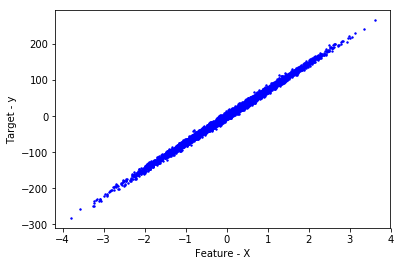

In [11]:
plt.scatter(X, y, s=2, c='blue')
plt.xlabel("Feature - X")
plt.ylabel("Target - y")
plt.show()

Ahora, instanciaremos el modelo de regresión lineal con la clase `LinealRegresion` bajo el objeto `linear_model`

In [12]:
linear_model = LinearRegression()

A continuación debemos de "ajustar al modelo". Este es el proceso de hallar tanto el intercepto como la pendiente de la línea resultante. Esto lo hacemos con el método `fit`:

In [13]:
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Para revisar los resultados, debemos de inspeccionar los atributos `coref_` para la pendiente, y `intercept_` para el intercepto:

In [14]:
print(linear_model.coef_)
print(linear_model.intercept_)

[73.49181592]
-0.017867015417801557


Este modelo (es decir, el objeto `linear_model`) ya esta "entrenado". Podemos utilizarlo para hacer una predicción con el método `predict`. La pasaremos como argumento la variable independiente `X` para lo que nos generará la nueva variable dependiente predicha `pred`. Grafiquemos ambos pares de variables, `X` vs `y`, y `X` vs `pred` para ver la diferencia entre los resultados.

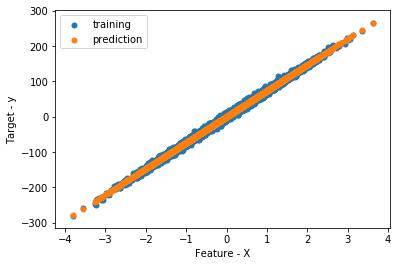

In [15]:
pred = linear_model.predict(X)
plt.scatter(X, y, s=25, label='training')
plt.scatter(X, pred, s=25, label='prediction')
plt.xlabel("Feature - X")
plt.ylabel("Target - y")
plt.legend()
plt.show()

Los puntos azules representan los datos actuales, mientras que los naranjas representan los valores predichos. Podemos ver cuan cercanos se encuentras los valores actuales y predichos.

## Regresión Lineal Simple para Dataset de Casas
Ahora, partamos de un dataset con valores de precios de casas (en dólares) de un área (el pies cuadrados) determinada. Aquí, la variable independiente será el área y lo que queremos predecír será el precio.

In [18]:
# Con un dataframe real...
house_df = pd.read_csv('House_data_LR.csv')

In [19]:
house_df.head()

,Unnamed: 0,sqft_living,price
0,0,1180,221900.0
1,1,2570,538000.0
2,2,770,180000.0
3,3,1960,604000.0
4,4,1680,510000.0


In [20]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 3 columns):
Unnamed: 0     21613 non-null int64
sqft_living    21613 non-null int64
price          21613 non-null float64
dtypes: float64(1), int64(2)
memory usage: 506.6 KB


Verificamos que no halla valores que nos puedan afectar en el modelamiento. 

In [16]:
house_df.isna().any()

Unnamed: 0     False
sqft_living    False
price          False
dtype: bool

Eliminemos la columna `Unnamed: 0` que ha sido generada como parte de la importación de los datos del archivo CSV:

In [21]:
house_df.drop(columns='Unnamed: 0', inplace=True)

In [26]:
house_df.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Debemos preparar el dataset para construir el modelo. Para esto vamos a separar la variable independiente de la variable objetivo. Vamos a utilizar la nomenclatura estándar de este proceso: `X` será la variable independiente, e `y` será el objetivo.

In [34]:
X = house_df.iloc[:, :1].values     # Array 2D
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [35]:
X1 = house_df['sqft_living'].values
X1 #Es distinto

array([1180, 2570,  770, ..., 1020, 1600, 1020], dtype=int64)

In [29]:
y = house_df['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [25]:
X.shape

(21613, 1)

In [26]:
y.shape

(21613,)

A continuación, vamos a separar los datos (es decir, hacer un `split`) en una muestra de entrenamiento (*train*) y una muestra de prueba (*test*). Las recomendaciones a seguir para este proceso son:

* Los datos deben ser muestras aleatorias del universo total
* Se debe de utilizar el 75% de las muestras para la fase de entrenamiento y el 25% restante para la evaluación del modelo.

El proceso es entrenar al modelo con el *training set* y luego probar el modelo con el *test set*. Esto permite una evaluación más precisa del modelo ya que el dataset de prueba no ha formado parte del proceso de entrenamiento.

La librería `sklearn` nos provee una función especial que nos ayuda en este proceso: `train_test_split`. Toma como parametros de entrada `X` y `y` como las variables independiente y el objetivo, `test_size` que define el tamaño de la muestra de prueba (un 25% sugerido) y un valor ara inicializar el generados de numeros aletorios `random_state` para que tome muestras aleatorias.

Los resulados de esta funcion son el pare `X_train`, `y_train` con los datos del dataset de entrenamiento, y el par `X_test`, `y_test` con los datos para las pruebas.

In [37]:
from sklearn.model_selection import train_test_split
# 25% ->test
# 75% -> training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

Ahora, instanciamos el modelo de Regresión Lineal sobre el objeto `simple_lr` y lo ajustamos (con el métdo `fit`) utilizando los datos de entrenamento:

In [39]:
from sklearn.linear_model import LinearRegression

simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

¡Ya esta! No hay mucho glamour en el proceso... Generemos una muestra con datos predichos a partir de la variable independiente de pruebas `X_test`. Recuerde que para cada `X_test` se tienen los valores objetivos de `y_test`. Pero esta vez, estamos prediciendo estos valores con el método `predict` sobre `y_prec`. Si el modelo es perfecto, ambos datos serán iguales.

In [40]:
y_pred = simple_lr.predict(X_test)

Podemos probar el modelo sobre los datos, tanto de entrenamiento como de prueba de forma gráfica.

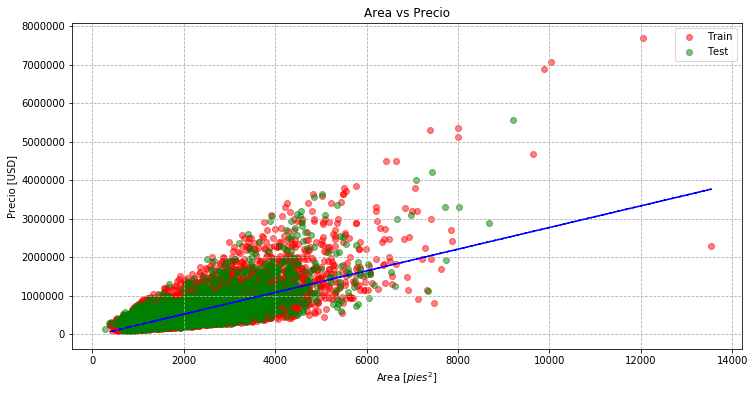

In [41]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(X_train, y_train, color='r', alpha=0.5, label='Train')
plt.scatter(X_test, y_test, color='g', alpha=0.5, label='Test')
plt.plot(X_train, simple_lr.predict(X_train), color='b', linestyle='--')

plt.title("Area vs Precio")
plt.xlabel(f"Area [$pies^2$]")
plt.ylabel("Precio [USD]")
plt.legend()
plt.grid(linestyle='dashed')

plt.show()

## Evaluación de la estimación
Existen varias medidas y parámetros para obtener la precisión del modelo de Regresión Lineal.

### Error medio cuadratico (MSE)
Como su nombre sugiere, es el promedio de las diferencias al cuadrado entre los valores actuales y los predichos.

$$MSE = \frac{\sum(\mid\widehat{Y_i} - y_i\mid)^2}{n}$$

A mayor el valor del MSE, mayor el error del modelo.

### Raiz del error medio cuadrático (Root MSE)
Se puede obtener la raiz cuadrada del MSE para obtener otra estimación más reducida:

$$MSE = \sqrt{\frac{\sum(\mid\widehat{Y_i} - y_i\mid)^2}{n}}$$

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE =", rmse)

RMSE = 257125.13804007214


### R al cuadrado o coeficiente de determinación (R^2)
Representa cuanta aleatoriedad en los datos puede ser explicada por el modelo. En otras palabras, evalua la calidad del modelo para replicar los resultados.

El coeficiente de determinación siempre será un valor entre 0 y 1. A mayor valor de R^2, mejor será el modelo.

In [32]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R2 =", r2)
print()
print("coef =", simple_lr.coef_)
print("intercept =", simple_lr.coef_)

R2 = 0.5020612063135523

coef = [281.4054356]
intercept = [281.4054356]


Hagamos una predicción del modelo utilizando un area deteminada (el área debe estan en el rango del dataset de la variable independiente que se utilizó para entrenar el modelo):

In [33]:
x_unseen = np.array([1500]).reshape(1, 1)
est_price = simple_lr.predict(x_unseen)

print(f"Para una casa de {x_unseen[0, 0]:,} pies cuadrados, el precio estimado es {est_price[0]:,.2f} USD")

Para una casa de 1,500 pies cuadrados, el precio estimado es 376,666.85 USD
